In [337]:
#ATOM-Exploratory Data Analysis 2020

from __future__ import print_function
import datetime
print(datetime.datetime.now())
import http.server
import urllib.parse
from urllib.parse import urlparse
import matplotlib
import datetime
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import urllib
from urllib.request import urlretrieve
import time
import pyodbc
import sys
from shutil import copyfile
import concurrent.futures
import os
import gc

from scipy import stats

import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

sns.set()
print("OK")



2020-04-22 19:14:56.681121
OK


In [338]:
#FETCH DATA FROM DATABASe

DBSTRING = DBSTRING = "DRIVER={SQL Server};Server=LAPTOP-Q26NOFQQ\ATOMLOCALDB;Trusted_Connection=yes;Persist Security Info=false;Integrated Security=sspi;connection timeout=60;database=AtomLocalDB;"
print(DBSTRING)
connection = pyodbc.connect(DBSTRING)

stmt="select * from Atom_EDA_DayChange_v1"

print(stmt)
eventtime=[]
print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)
print(df.columns)

df.describe()




DRIVER={SQL Server};Server=LAPTOP-Q26NOFQQ\ATOMLOCALDB;Trusted_Connection=yes;Persist Security Info=false;Integrated Security=sspi;connection timeout=60;database=AtomLocalDB;
select * from Atom_EDA_DayChange_v1
2020-04-22 19:14:58.691478
Index(['InstrumentKey', 'tMinus2', 'prevdate', 'tradedate', 'cival_START',
       'HighLowDiffPoints_START', 'ChangePoints_START', 'ChangePercent_START',
       'cilabel_START', 'cibucket_START', 'HighLowDiffPoints_EOD',
       'IntradayOpenClose_EOD', 'ChangePointsFromPrevDay_EOD',
       'ChangePointsFromPrevDayPercent_EOD', 'cilabel_EOD', 'cibucket_EOD',
       'cival_EOD'],
      dtype='object')


,cival_START,HighLowDiffPoints_START,ChangePoints_START,ChangePercent_START,cibucket_START,HighLowDiffPoints_EOD,IntradayOpenClose_EOD,ChangePointsFromPrevDay_EOD,ChangePointsFromPrevDayPercent_EOD,cibucket_EOD,cival_EOD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.612812,362.054287,211.466010,0.929725,3.620297,361.133290,-7.176590,211.362686,0.926288,3.617673,1.608256
std,1.483996,302.956924,252.830282,1.195934,0.973920,302.605777,277.109258,253.906089,1.156285,0.967928,1.481496
min,0.329080,65.000000,0.550000,0.002659,1.000000,65.000000,-1681.000000,1.150000,0.004854,1.000000,0.329080
25%,0.900210,203.950000,64.950000,0.276484,3.000000,203.600000,-128.475000,64.350000,0.273674,3.000000,0.898975
50%,1.266260,285.500000,152.400000,0.662286,3.000000,284.950000,-2.000000,151.500000,0.659902,3.000000,1.266260
75%,1.840640,414.450000,282.250000,1.173505,4.000000,414.250000,120.575000,282.250000,1.179325,4.000000,1.835385
max,21.866190,4591.900000,3413.300000,20.219714,6.000000,4591.900000,2428.900000,3413.300000,16.818967,6.000000,21.866190


Text(0.5, 1.0, 'Scatterplot CI vs Change')

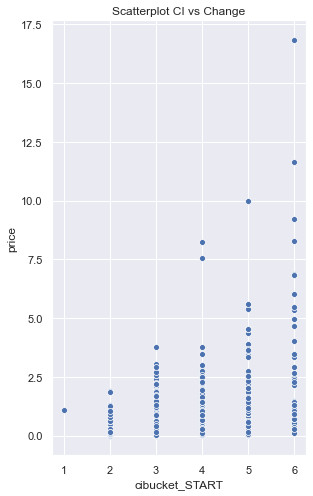

In [339]:
#BUILD SCATTERPLOT
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='cibucket_START',y = 'ChangePointsFromPrevDayPercent_EOD', data = df)
plt.ylabel("price")
plt.title("Scatterplot CI vs Change")



In [340]:
#FETCH DATA FROM DATABASe
stmt="select cibucket_START, count(1) bucketcount from Atom_EDA_DayChange_v1 group by cibucket_START"

print(stmt)
eventtime=[]
print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)

print(df.columns)
print(df)

''''ax = df.plot(df['cibucket_START'],df['bucketcount'], figsize = (12, 7.5))
ax.set_xlabel("CI")
ax.set_ylabel("Count")
ax.set_title('Per CI Count')
#ax.legend_.remove()
plt.show()'''



select cibucket_START, count(1) bucketcount from Atom_EDA_DayChange_v1 group by cibucket_START
2020-04-22 19:15:01.036196
Index(['cibucket_START', 'bucketcount'], dtype='object')
   cibucket_START  bucketcount
0               1            1
1               2           85
2               3          537
3               4          287
4               5          190
5               6           43


'\'ax = df.plot(df[\'cibucket_START\'],df[\'bucketcount\'], figsize = (12, 7.5))\nax.set_xlabel("CI")\nax.set_ylabel("Count")\nax.set_title(\'Per CI Count\')\n#ax.legend_.remove()\nplt.show()'

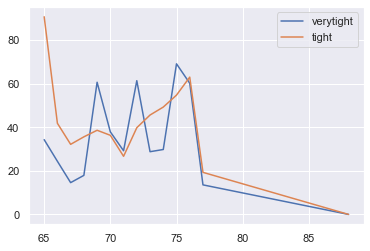

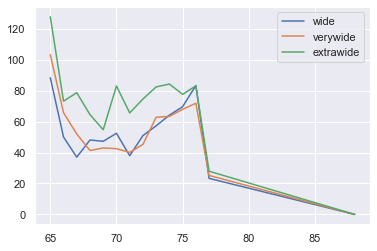

In [341]:
#FETCH DATA FROM DATABASe
stmt="select ascii(mz_code) mz_code,mzavgocspread from Atom_EDA_MZPointsChange_v1 where cibucket = 2 order by 1 "
#print(stmt)
df_2 = pd.read_sql(stmt, connection)
#print(df_2.columns)
#print(df_2)
plt.plot(df_2['mz_code'],df_2['mzavgocspread'], label = 'verytight')

stmt="select ascii(mz_code) mz_code,mzavgocspread from Atom_EDA_MZPointsChange_v1 where cibucket = 3 order by 1"
#print(stmt)
df_3 = pd.read_sql(stmt, connection)
#print(df_3.columns)
#print(df_3)
plt.plot(df_3['mz_code'],df_3['mzavgocspread'], label = 'tight')

plt.legend()
plt.show()

stmt="select ascii(mz_code) mz_code,mzavgocspread from Atom_EDA_MZPointsChange_v1 where cibucket = 4 order by 1"
#print(stmt)
df_4 = pd.read_sql(stmt, connection)
#print(df_4.columns)
#print(df_4)
plt.plot(df_4['mz_code'],df_4['mzavgocspread'], label = 'wide')

stmt="select ascii(mz_code) mz_code,mzavgocspread from Atom_EDA_MZPointsChange_v1 where cibucket = 5 order by 1"
#print(stmt)
df_5 = pd.read_sql(stmt, connection)
#print(df_5.columns)
#print(df_5)
plt.plot(df_5['mz_code'],df_5['mzavgocspread'], label = 'verywide')

stmt="select ascii(mz_code) mz_code,mzavgocspread from Atom_EDA_MZPointsChange_v1 where cibucket = 6 order by 1"
#print(stmt)
df_6 = pd.read_sql(stmt, connection)
#print(df_6.columns)
#print(df_6)
plt.plot(df_6['mz_code'],df_6['mzavgocspread'], label = 'extrawide')

plt.legend()
plt.show()




2020-04-22 19:15:03.547063
Index(['cibucket', 'eventvalue'], dtype='object')
   cibucket  eventvalue
0         2           9
1         3         115
2         4         114
3         5         196
4         6         146


Text(0.5, 1.0, 'Scatterplot CI vs Reversal')

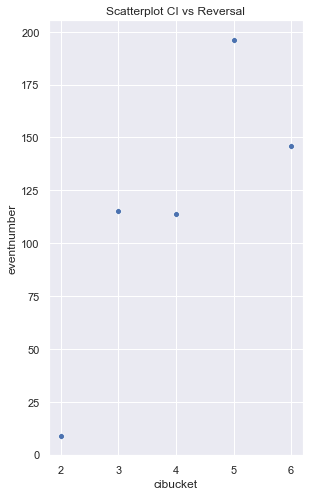

In [342]:
#stmt="select cibucket,avg(eventvalue*1.0) eventvalue from Atom_EDA_MZKeyReversalEvents_v1 where EventCodekey = 140 group by cibucket order by 1"

stmt="select top 90 cibucket, count(1) eventvalue from Atom_EDA_MZKeyReversalEvents_v1 where EventCodekey = 140 group by cibucket order by 1"

#print(stmt)
eventtime=[]
print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)
print(df.columns)
df.describe()

print(df)

plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(x='cibucket',y = 'eventvalue', data = df)
plt.ylabel("eventnumber")
plt.title("Scatterplot CI vs Reversal")



2020-04-22 19:15:25.075589
Index(['timeateventopen', 'direction_vwap', 'Candle_ClosePx',
       'Relation_CandlevsPrevDay_Close', 'NValue_Pma200', 'NValue_Pma20',
       'relprev', 'relpma200', 'direction_pmalive', 'direction_vwap',
       'newtime', 'newclose', 'priceVwap200'],
      dtype='object')
0     2020-03-31 09:15:00
1     2020-03-31 09:18:00
2     2020-03-31 09:21:00
3     2020-03-31 09:24:00
4     2020-03-31 09:27:00
              ...        
119   2020-03-31 15:12:00
120   2020-03-31 15:15:00
121   2020-03-31 15:18:00
122   2020-03-31 15:21:00
123   2020-03-31 15:24:00
Name: newtime, Length: 124, dtype: datetime64[ns] 0      19125.65
1      19050.05
2      19145.70
3      19020.50
4      18984.50
         ...   
119    19120.00
120    19049.50
121    19037.80
122    19048.90
123    19032.85
Name: Candle_ClosePx, Length: 124, dtype: float64


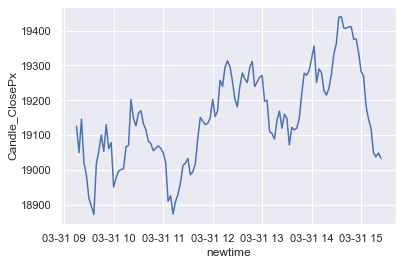

In [343]:
stmt="""select top 910 timeateventopen, direction_vwap, Candle_ClosePx, Relation_CandlevsPrevDay_Close, 
NValue_Pma200, NValue_Pma20, dbo.atom_get_value_buckets(Relation_CandlevsPrevDay_Close) relprev,
dbo.atom_get_value_buckets(Relation_CandleClosevsPma200) relpma200,
direction_pmalive, direction_vwap
from Atom_AI_Candle_Observations_For_RL where tradedate = convert(date,'2020-03-31') order by timeateventopen """
#2019-03-18

#print(stmt)
print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)
df["newtime"] = pd.to_datetime(df['timeateventopen'],format='%Y-%m-%d %H:%M:%S')
df["newclose"] = np.log1p(df["Candle_ClosePx"])
df["priceVwap200"] = ((df["Candle_ClosePx"]-df["NValue_Pma200"])/df["NValue_Pma200"])*100


#for i,val in df.iterrows:
#    df.at(i,"priceVwap200") = (val["Candle_ClosePx"]/val["NValue_Pma200"])
print(df.columns)
#df.describe()

print(df["newtime"],df["Candle_ClosePx"])

sns.lineplot(data=df,x='newtime',y='Candle_ClosePx')

#df.plot(df['newtime'],df['Candle_ClosePx'])

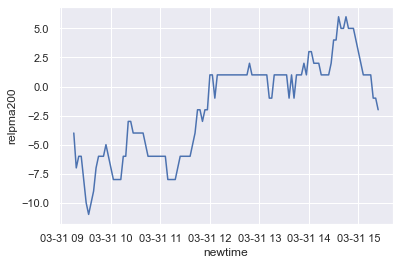

In [347]:
sns.lineplot(data=df,x='newtime',y='relpma200')


In [348]:
#sns.lineplot(data=df,x='newtime',y='direction_vwap')

#print(df['direction_vwap'])

0      0.000
1      0.307
2      0.710
3      0.989
4      1.228
       ...  
119    1.919
120    1.672
121    1.426
122    1.280
123    1.156
Name: direction_pmalive, Length: 124, dtype: float64


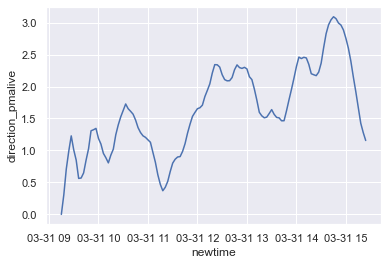

In [349]:
sns.lineplot(data=df,x='newtime',y='direction_pmalive')

print(df['direction_pmalive'])

In [350]:
#sns.lineplot(data=df,x='newtime',y='newclose')

#stats.probplot(x=df['newclose'], dist = "norm", plot = plt)
#plt.title("")
#plt.show()

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [351]:
regression_model = LinearRegression()
poly = PolynomialFeatures(5)
y = np.asarray(df['Candle_ClosePx'])
x = np.asarray(df.index.values)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123]


In [352]:
X_transform_1 = poly.fit_transform(x.reshape(-1, 1))
regression_model.fit(X_transform_1, y.reshape(-1, 1))
y_learned_1 = regression_model.predict(X_transform_1)

print(y_learned_1,df['Candle_ClosePx'])



[[19081.03432501]
 [19068.61326487]
 [19057.723457  ]
 [19048.26251747]
 [19040.13219076]
 [19033.23827356]
 [19027.49053848]
 [19022.8026578 ]
 [19019.0921272 ]
 [19016.28018953]
 [19014.29175852]
 [19013.05534254]
 [19012.50296835]
 [19012.57010481]
 [19013.19558666]
 [19014.32153824]
 [19015.89329724]
 [19017.85933842]
 [19020.1711974 ]
 [19022.78339435]
 [19025.65335777]
 [19028.74134821]
 [19032.01038202]
 [19035.4261551 ]
 [19038.95696661]
 [19042.57364276]
 [19046.24946052]
 [19049.96007136]
 [19053.68342502]
 [19057.39969321]
 [19061.0911934 ]
 [19064.74231253]
 [19068.33943074]
 [19071.87084516]
 [19075.32669361]
 [19078.69887835]
 [19081.98098985]
 [19085.16823049]
 [19088.25733833]
 [19091.24651083]
 [19094.13532864]
 [19096.92467928]
 [19099.6166809 ]
 [19102.21460608]
 [19104.72280547]
 [19107.14663162]
 [19109.49236268]
 [19111.76712615]
 [19113.97882262]
 [19116.13604953]
 [19118.24802487]
 [19120.32451096]
 [19122.3757382 ]
 [19124.41232877]
 [19126.4452204 ]
 [19128.48

In [353]:
#newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 20))
#X_extended_transform_1 = poly.fit_transform(newindex.reshape(-1, 1))
#y_predict_1 = regression_model.predict(X_extended_transform_1)

#x = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
#future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

regression_model2 = LinearRegression()
poly2 = PolynomialFeatures(5)
y2 = np.asarray(df['NValue_Pma20'])
x2 = np.asarray(df.index.values)
X_transform_2 = poly.fit_transform(x2.reshape(-1, 1))
regression_model.fit(X_transform_2, y2.reshape(-1, 1))
y_learned_2 = regression_model.predict(X_transform_2)

print(y_learned_2,df['NValue_Pma20'])


regression_model3 = LinearRegression()
poly3 = PolynomialFeatures(5)
y3 = np.asarray(df['NValue_Pma200'])
x3 = np.asarray(df.index.values)
X_transform_3 = poly.fit_transform(x3.reshape(-1, 1))
regression_model.fit(X_transform_3, y3.reshape(-1, 1))
y_learned_3 = regression_model.predict(X_transform_3)

print(y_learned_3,df['NValue_Pma200'])


[[18771.79578817]
 [18797.30456446]
 [18820.85497442]
 [18842.558076  ]
 [18862.52114759]
 [18880.84774745]
 [18897.63777317]
 [18912.98752119]
 [18926.9897462 ]
 [18939.73372062]
 [18951.30529412]
 [18961.78695299]
 [18971.25787969]
 [18979.79401227]
 [18987.46810385]
 [18994.34978207]
 [19000.50560859]
 [19005.9991385 ]
 [19010.89097984]
 [19015.23885304]
 [19019.09765037]
 [19022.51949543]
 [19025.55380261]
 [19028.24733654]
 [19030.64427159]
 [19032.78625127]
 [19034.71244778]
 [19036.4596214 ]
 [19038.06218   ]
 [19039.55223849]
 [19040.95967828]
 [19042.31220675]
 [19043.63541673]
 [19044.95284592]
 [19046.28603643]
 [19047.65459417]
 [19049.07624834]
 [19050.56691092]
 [19052.1407361 ]
 [19053.81017979]
 [19055.58605901]
 [19057.47761144]
 [19059.49255483]
 [19061.63714646]
 [19063.91624267]
 [19066.33335825]
 [19068.89072593]
 [19071.58935587]
 [19074.4290951 ]
 [19077.40868698]
 [19080.52583069]
 [19083.77724066]
 [19087.15870608]
 [19090.66515031]
 [19094.29069042]
 [19098.02

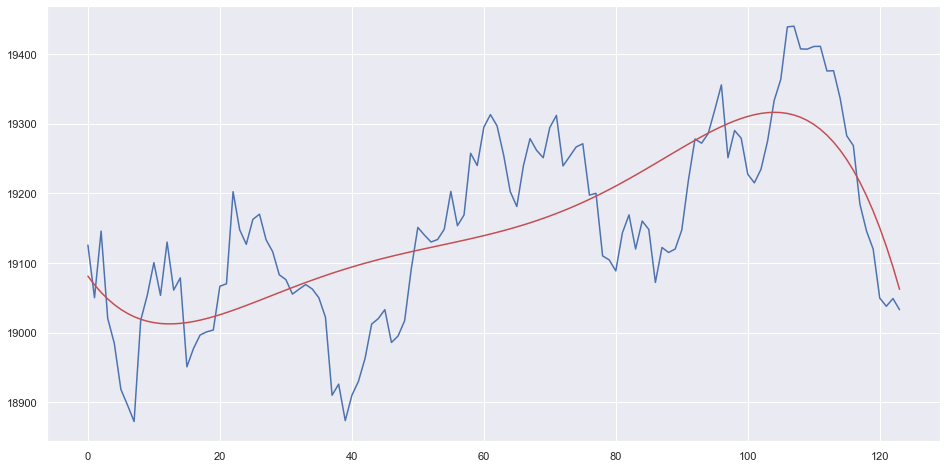

In [354]:

plt.figure(figsize=(16,8))
plt.plot(x,df['Candle_ClosePx'], label='pricePma200Rel')

#Plot the regression model
plt.plot(x,y_learned_1, color='r', label='Mathematical Model')

#plt.plot(future_x,y_predict, color='g', label='Future Predictions')

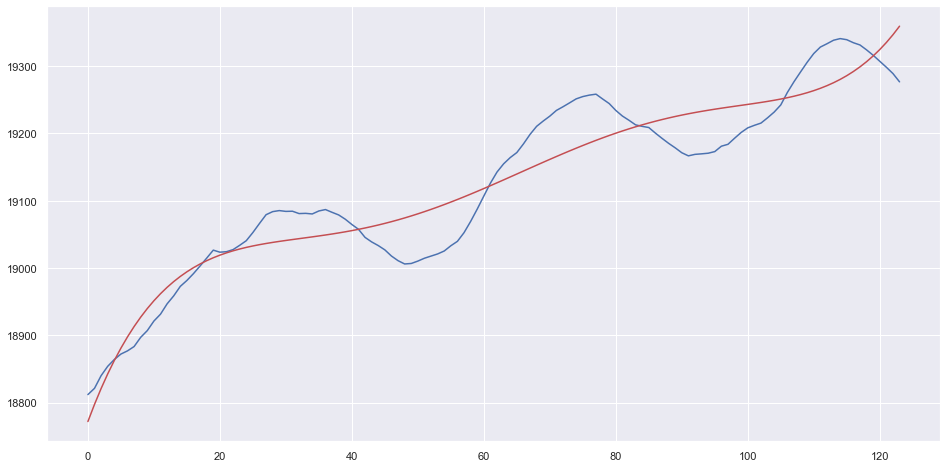

In [355]:
plt.figure(figsize=(16,8))
plt.plot(x,df['NValue_Pma20'], label='pma20')

#Plot the regression model
plt.plot(x,y_learned_2, color='r', label='Mathematical Model')

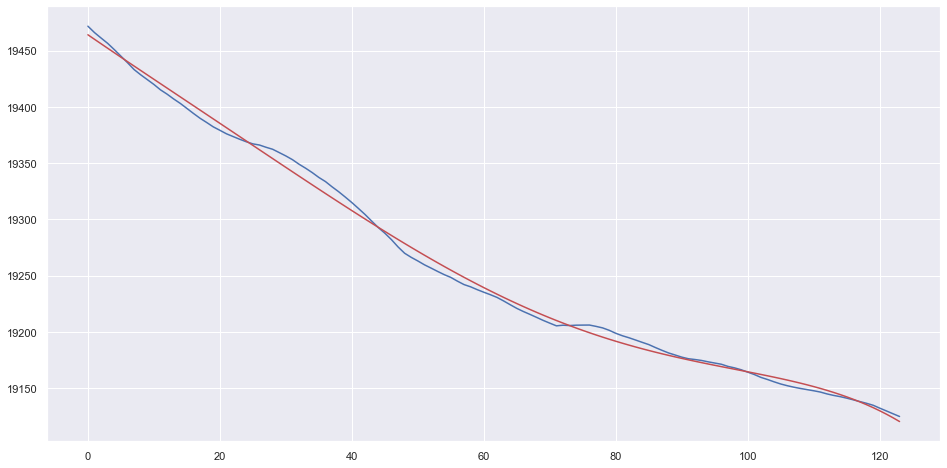

In [356]:
plt.figure(figsize=(16,8))
plt.plot(x,df['NValue_Pma200'], label='pma200')

#Plot the regression model
plt.plot(x,y_learned_3, color='r', label='Mathematical Model')

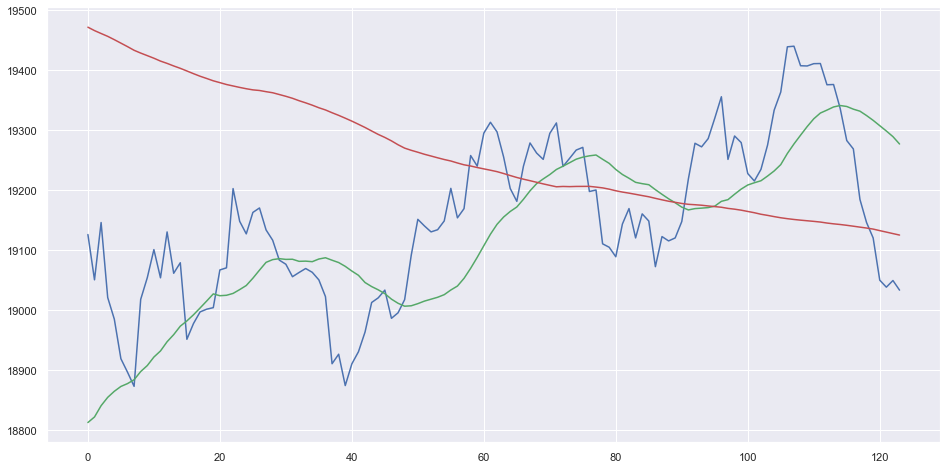

In [357]:
plt.figure(figsize=(16,8))
plt.plot(x,df['Candle_ClosePx'],color='b', label='closepx')
plt.plot(x,df['NValue_Pma20'], color='g',label='pma20')
plt.plot(x,df['NValue_Pma200'], color='r', label='pma200')

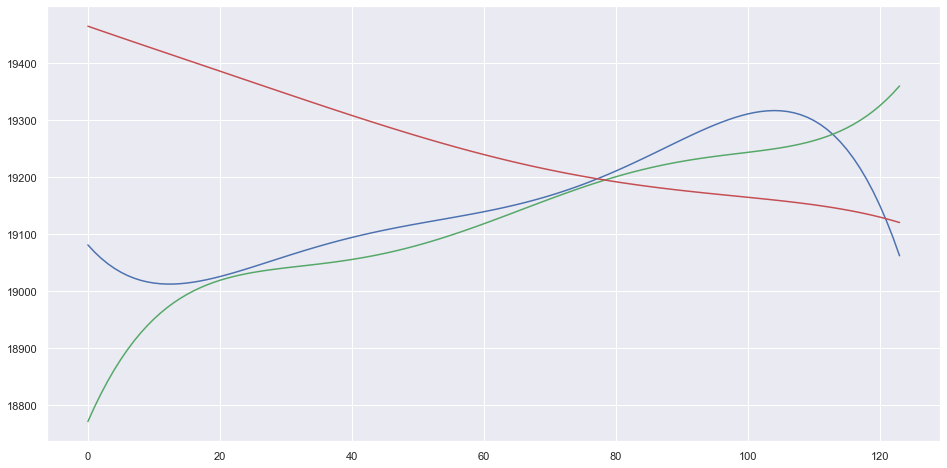

In [358]:
plt.figure(figsize=(16,8))
plt.plot(x,y_learned_1, color='b', label='Mathematical Model')
plt.plot(x,y_learned_2, color='g',label='Mathematical Model2')
plt.plot(x,y_learned_3, color='r', label='Mathematical Model3')

In [ ]:
stmt="""select *
from Atom_AI_Candle_Observations_For_RL where tradedate = convert(date,'2020-03-31') order by timeateventopen """
#2019-03-18

#print(stmt)
print(datetime.datetime.now())
df = pd.read_sql(stmt, connection)
